
End-to-End Exploratory Data Analysis (EDA) on the Titanic Dataset
Project Objective: To perform a comprehensive, step-by-step exploratory data analysis to understand the key factors that influenced survival on the Titanic. This notebook will serve as a complete guide, covering data loading, cleaning, analysis, feature engineering, and visualization, with theoretical explanations at each stage.




Step 1: Setup - Importing Libraries
We'll start by importing the essential Python libraries for data manipulation (pandas, numpy) and visualization (matplotlib, seaborn).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 347 (delta 25), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (347/347), 302.89 MiB | 20.82 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Updating files: 100% (245/245), done.


In [4]:
df = pd.read_csv('/content/Datasets/Titanic_Dataset/Titanic-Dataset.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Interpretation of .info():

The dataset contains 891 entries (passengers) and 12 columns.
Missing Values Identified: Age, Cabin, and Embarked have missing values. Cabin is missing a significant amount of data (~77%), which will require special attention.

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Interpretation of .describe():

Survived: About 38.4% of passengers in this dataset survived.
Age: The age ranges from ~5 months to 80 years, with an average age of about 30.
Fare: The fare is highly skewed, with a mean of  32butamedianofonly 14.45. The maximum fare is over $512, indicating the presence of extreme outliers.

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [12]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
median = df['Age'].median()
print(median)

28.0


In [14]:
## 1. Handling Age column
df['Age'] = df['Age'].fillna(median)

In [15]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
df['Embarked'].mode()[0]

'S'

In [17]:
## 2. Handle the Embarked Column
df['Embarked'].fillna(df['Embarked'].mode()[0] ,inplace=True)

/tmp/ipython-input-3726165935.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0] ,inplace=True)


In [18]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [19]:
## 3. Handling Cabin column

df['Has_Cabin'] = df['Cabin'].notna().astype(int)

In [20]:
df.drop('Cabin',axis=1,inplace=True)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [22]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [23]:
df['Has_Cabin'].value_counts()

,count
Has_Cabin,
0,687
1,204


Step 4: Univariate Analysis
We analyze each variable individually to understand its distribution.

Analyzing categorical features:


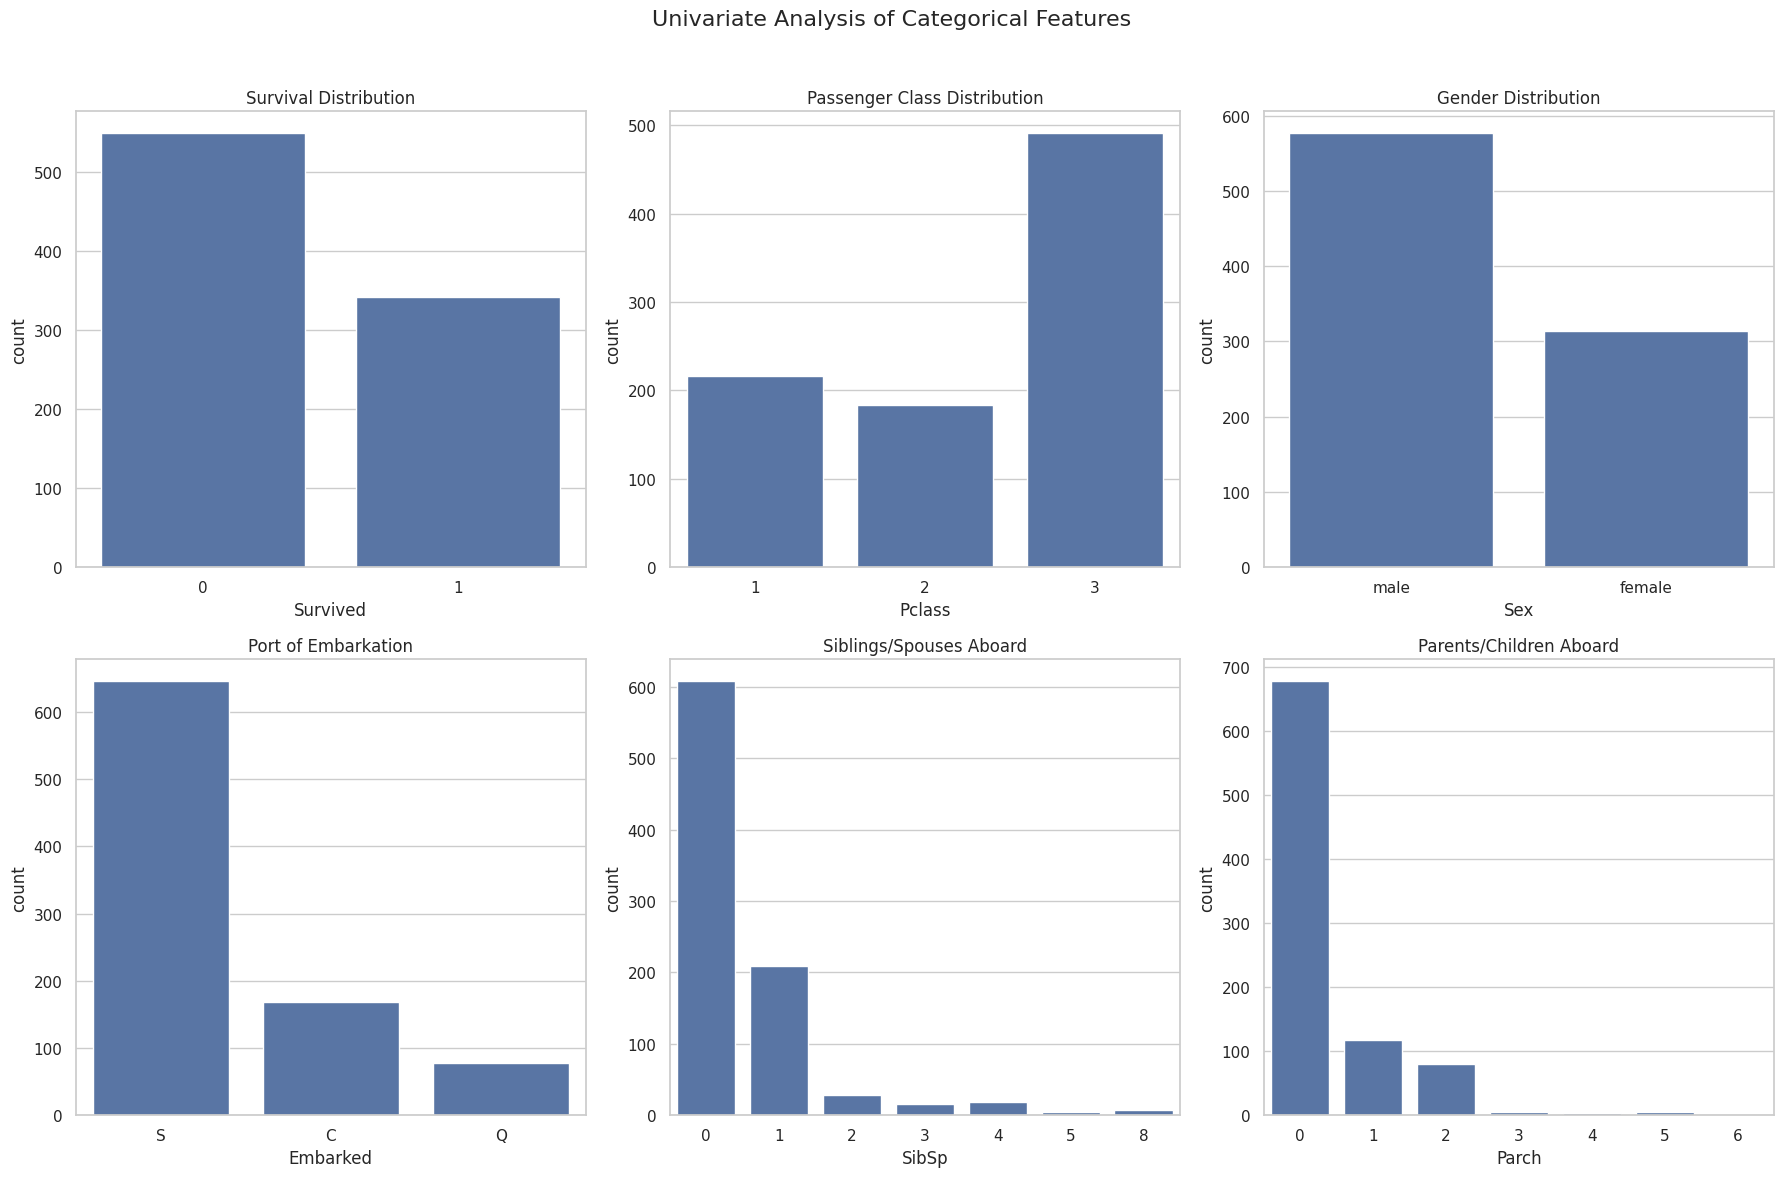

In [24]:
print("Analyzing categorical features:")

# Set up the figure for plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

# Plotting each categorical feature
sns.countplot(ax=axes[0, 0], x='Survived', data=df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Key Insights (Categorical):

Survival: Most passengers (over 500) did not survive.
Pclass: The 3rd class was the most populated, followed by 1st and then 2nd.
Sex: There were significantly more males than females.
Embarked: The vast majority of passengers embarked from Southampton ('S').
SibSp & Parch: Most passengers traveled alone.


Analyzing numerical features:


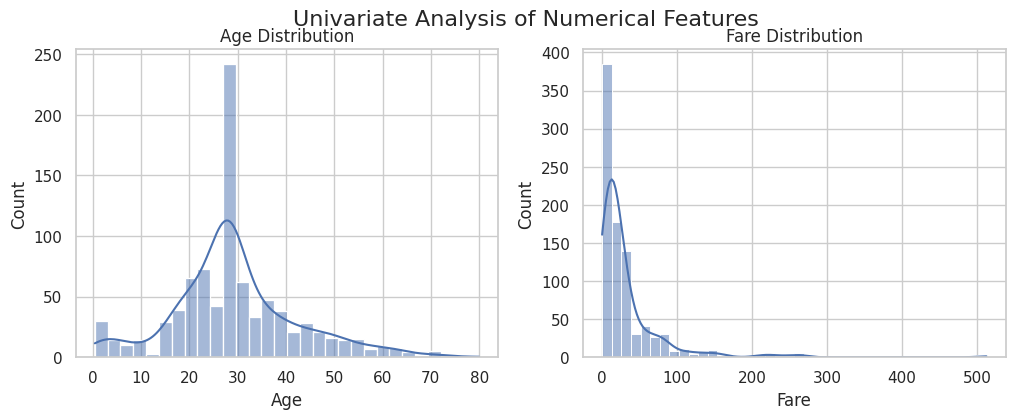

In [25]:
print("\nAnalyzing numerical features:")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

# Plotting Age distribution
sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=30).set_title('Age Distribution')

# Plotting Fare distribution
sns.histplot(ax=axes[1], data=df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

Key Insights (Numerical):

Age: The distribution peaks around the 20-30 age range. Remember we filled missing values with the median (28), which contributes to the height of that central bar.
Fare: The distribution is heavily right-skewed, confirming that most tickets were cheap, with a few very expensive exceptions.

Bivariate Analysis: Feature vs. Survival


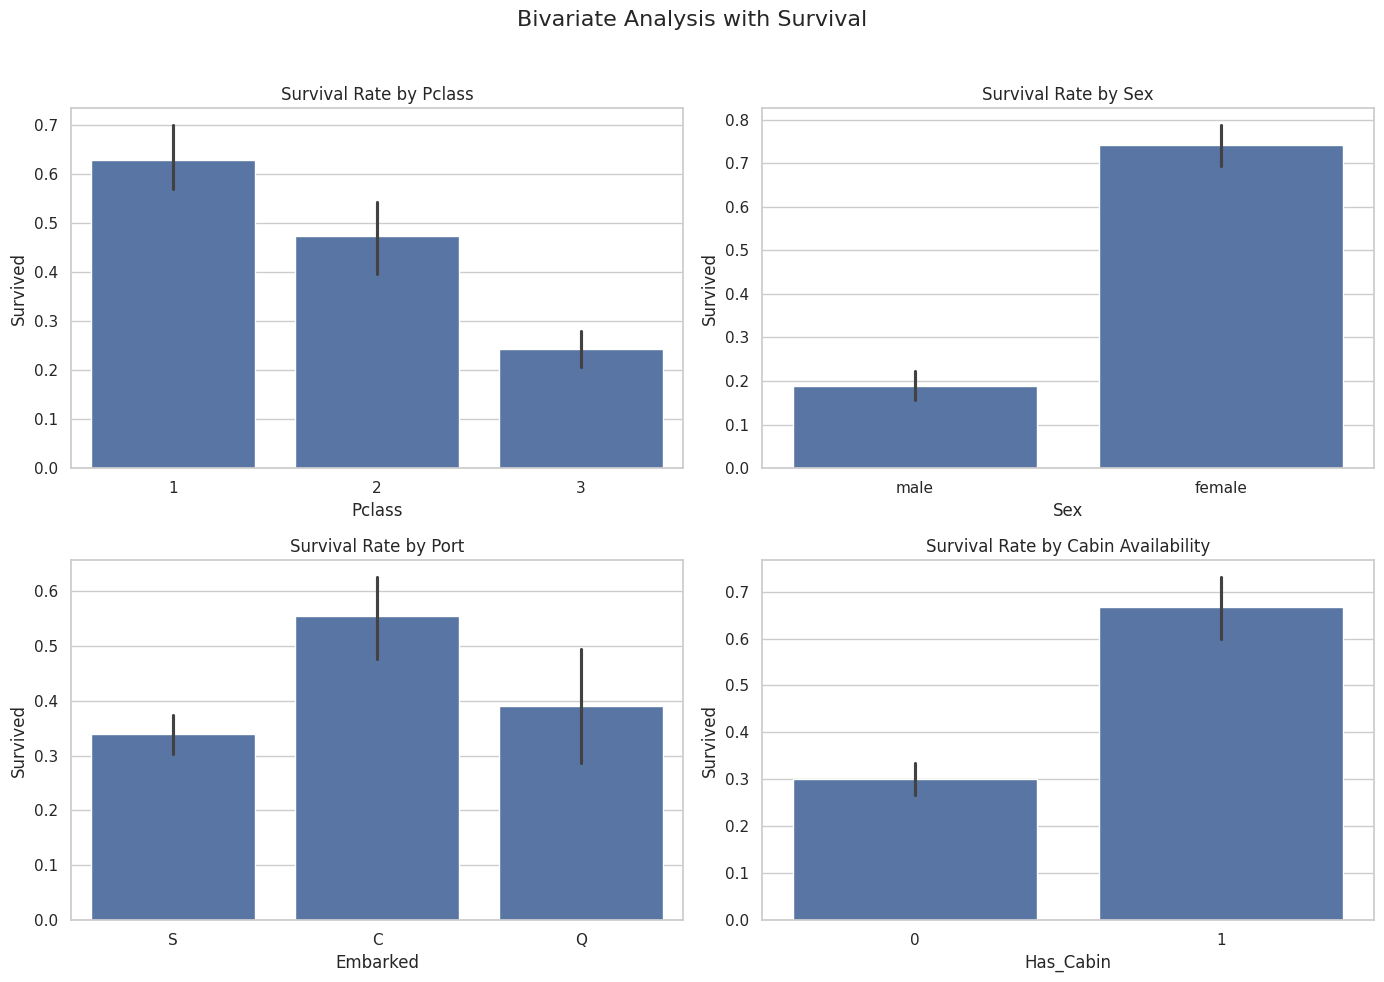

In [26]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=df).set_title('Survival Rate by Pclass')

# Sex vs. Survived
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=df).set_title('Survival Rate by Sex')

# Embarked vs. Survived
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=df).set_title('Survival Rate by Port')

# Has_Cabin vs. Survived
sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=df).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Those black lines are called confidence intervals.

In a bar plot that shows the mean (like the survival rate here, which is the mean of the 0s and 1s in the 'Survived' column), the confidence interval represents the range within which the true mean is likely to fall. A shorter line indicates less uncertainty about the mean, while a longer line indicates more uncertainty.

Seaborn automatically calculates and displays these 95% confidence intervals when you use barplot.

Key Insights (Bivariate):

Pclass: A clear trend emerges: 1st class passengers had a >60% survival rate, while 3rd class passengers had less than 25%.
Sex: This is the strongest predictor. Females had a survival rate of ~75%, while males had a rate below 20%.
Embarked: Passengers embarking from Cherbourg ('C') had a higher survival rate than those from the other ports.
Has_Cabin: Passengers with a registered cabin number had a much higher survival rate. This is likely correlated with being in 1st class.


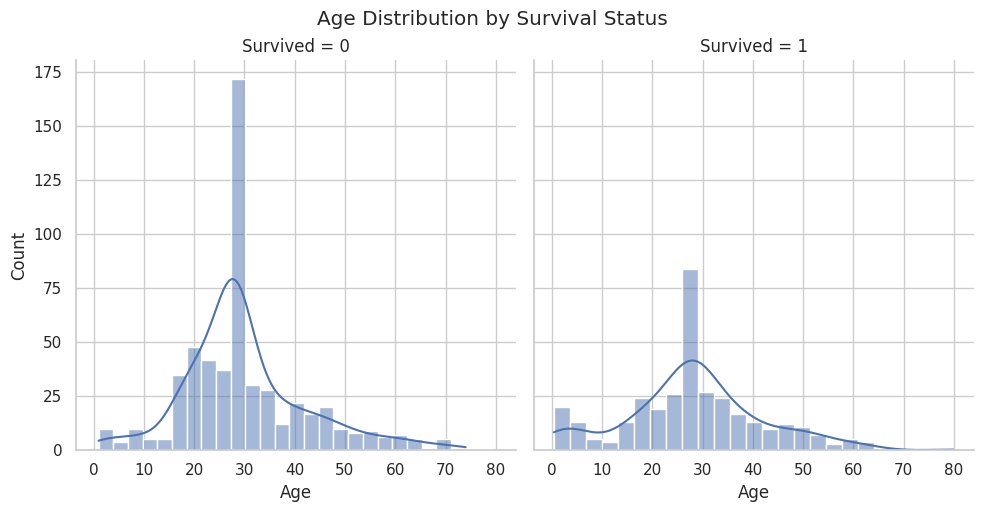

In [27]:
## Age vs Survival
g = sns.FacetGrid(df,col='Survived',height=5)
g.map(sns.histplot,'Age',bins=25,kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

Key Insight (Age vs. Survival):

Infants and young children had a higher probability of survival.
A large portion of non-survivors were young adults (20-40).
The oldest passengers (80 years) did not survive.

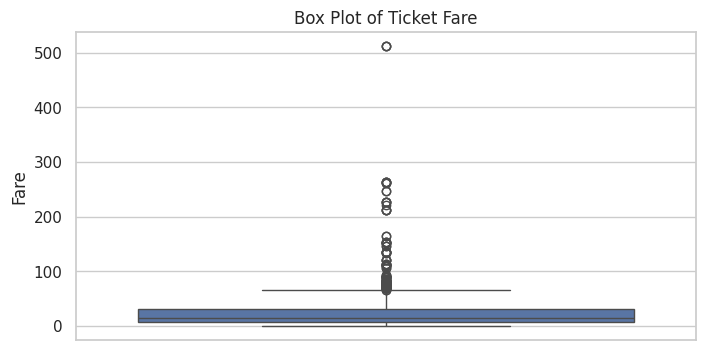

In [28]:
plt.figure(figsize=(8,4))
sns.boxplot(y='Fare',data=df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

Observation: The box plot confirms the presence of significant outliers. Most fares are concentrated below $100, but there are several fares extending far beyond, with some even exceeding $500. These are likely first-class passengers who booked luxurious suites. For some machine learning models, handling these outliers (e.g., through log transformation) would be an important step.

Step 6: Feature Engineering
Now, we'll create new features from the existing ones to potentially uncover deeper insights and provide more useful information for a machine learning model.

Theoretical Concept: Feature Engineering
Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. A good feature should be relevant to the problem and easy for a model to understand.

Common Techniques:

Combining Features: Creating a new feature by combining others (e.g., SibSp + Parch = FamilySize).
Extracting from Text: Pulling out specific information from a text feature (e.g., extracting titles from the Name column).
Binning: Converting a continuous numerical feature into a categorical one (e.g., binning Age into groups like 'Child', 'Adult', 'Senior').

In [33]:
## 1. Create a 'FamilySize' Column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [34]:
## 2. Create an 'Isalone' Feature

df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1,'IsAlone'] = 1

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1


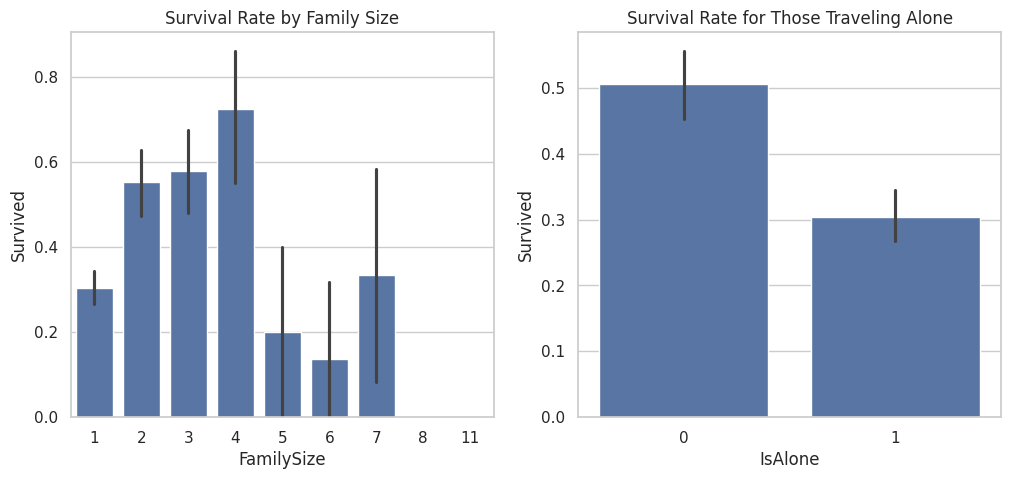

In [38]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=df).set_title('Survival Rate by Family Size')

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=df).set_title('Survival Rate for Those Traveling Alone')

plt.show()

Insight:

Passengers who were alone (IsAlone=1) had a lower survival rate (~30%) than those in small families.
Small families of 2 to 4 members had the highest survival rates.
Very large families (5 or more) had a very poor survival rate. This might be because it was harder for large families to stay together and evacuate.

In [39]:
df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [40]:
# 3. Extract 'Title' from the 'Name' column
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

Matches a space.
Titles in the names are usually preceded by a space. ([A-Za-z]+): This is the capturing group.
[A-Za-z]+: Matches one or more uppercase or lowercase letters. This captures the title itself (like Mr, Mrs, Miss, etc.).
.: Matches a literal dot (.) which usually follows the title.

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,Mr


In [42]:
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


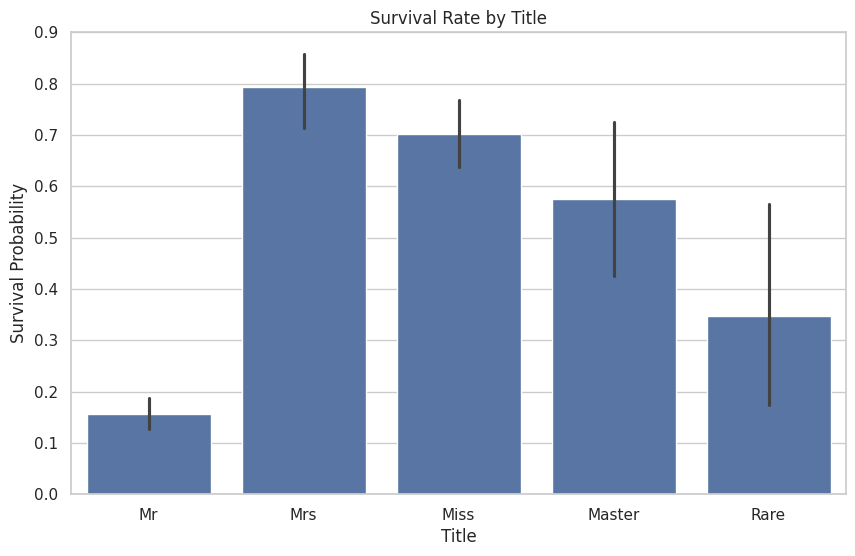

In [43]:
# Simplify the titles by grouping rare ones into a 'Rare' category
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

Insight: The Title feature gives us powerful information. 'Mrs' and 'Miss' (females) had high survival rates. 'Mr' (males) had a very low survival rate. 'Master' (young boys) had a significantly higher survival rate than 'Mr', reinforcing the 'children first' idea. The 'Rare' titles, often associated with nobility or status, also had a mixed but generally higher survival rate than common men.

Step 7: Multivariate Analysis
Now we explore interactions between multiple variables simultaneously, including our new engineered features.

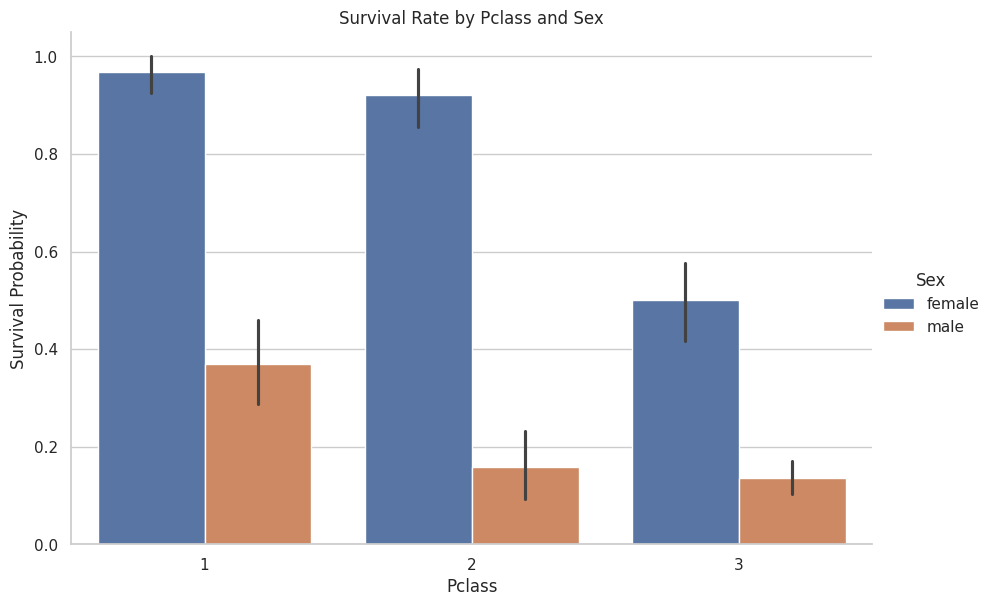

In [44]:
# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

# Insights: Females in all classes had a significantly higher survival rate than males.

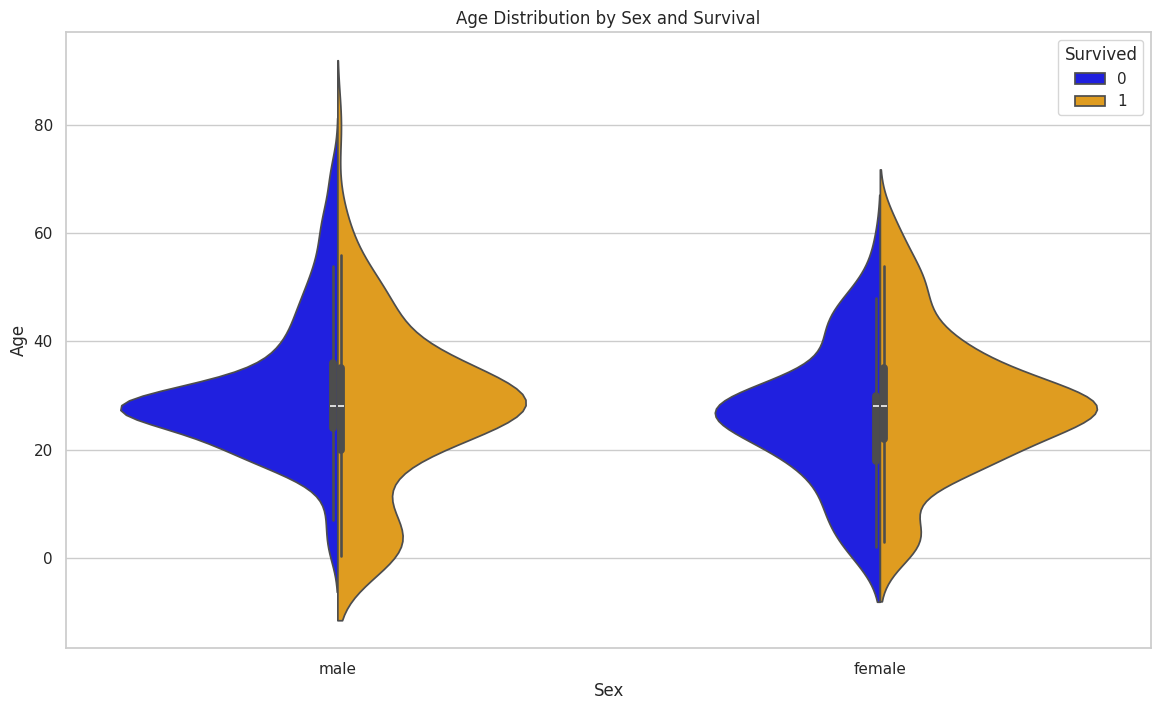

In [45]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

Insight from Violin Plot:

For males, the peak of the distribution for survivors (orange) is at a very young age (children), while the peak for non-survivors is in the 20-30 range.
For females, the distribution of survivors is much broader, indicating that females of most ages had a good chance of surviving.

Step 8: Correlation Analysis

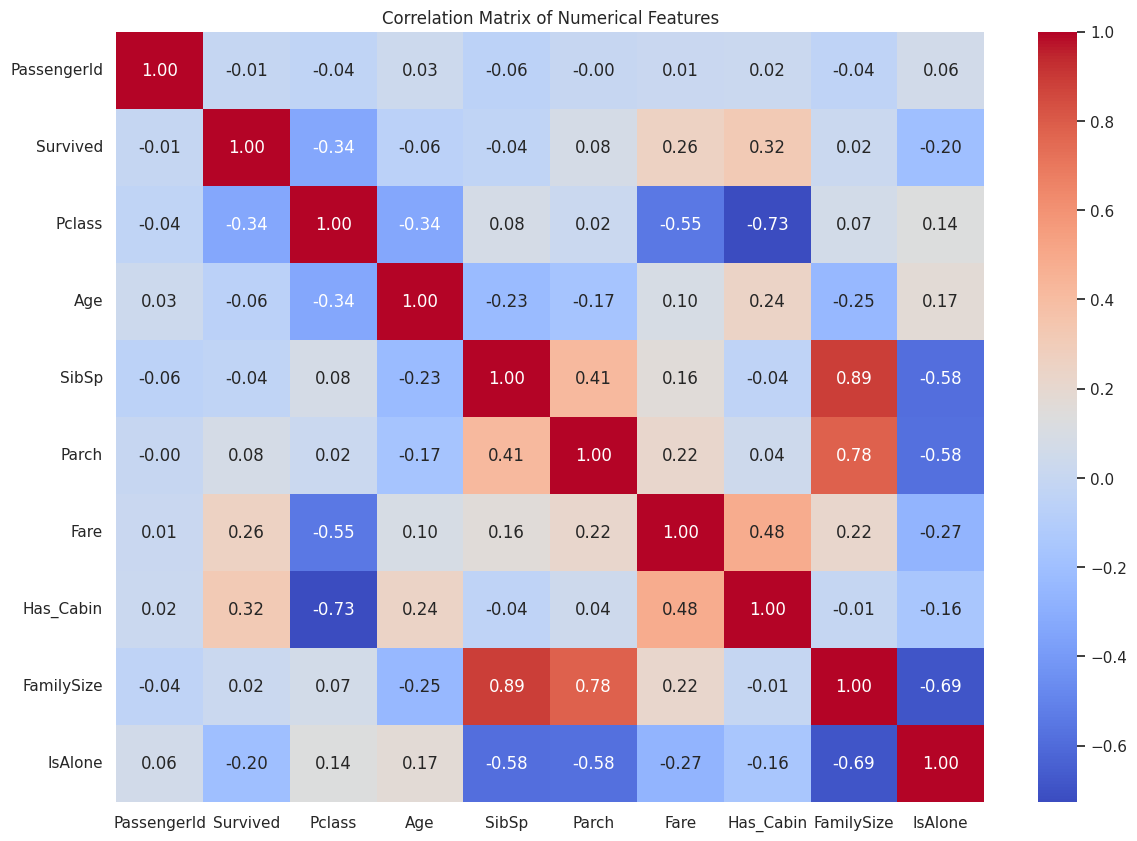

In [46]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Interpretation of the Heatmap:

Survived has a notable positive correlation with Fare and Has_Cabin, and a negative correlation with Pclass and our new IsAlone feature.
Pclass and Fare are strongly negatively correlated, which makes sense (1st class = high fare).
Our new FamilySize feature is composed of SibSp and Parch, so it's highly correlated with them by definition.

Step 9: Final Conclusion and Summary of Insights
This end-to-end EDA has provided a deep understanding of the Titanic dataset. Our analysis confirms the "women and children first" narrative and highlights the stark social inequalities of the time. Through feature engineering, we've created even more powerful predictors for a potential machine learning model.

Key Findings:

Strongest Predictors of Survival:

Title & Sex: Being female ('Mrs', 'Miss') was the single most significant advantage. Our engineered Title feature captures this nuance better than Sex alone, also showing that young boys ('Master') had a much higher survival rate than adult men ('Mr').
Passenger Class: There was a clear survival hierarchy: 1st > 2nd > 3rd class.
Age: Children and infants had a higher survival rate.
Other Influential Factors:

Family Size: Traveling in a small family (2-4 members) increased survival chances, while traveling alone or in a very large family decreased them.
Fare/Cabin: Having a cabin (and thus paying a higher fare) was strongly correlated with survival, acting as a proxy for wealth and passenger class.
Port of Embarkation: Passengers from Cherbourg ('C') had a higher survival rate, possibly because a higher proportion of them were in 1st class.
These insights are fundamental for the next step in the data science pipeline: building a predictive machine learning model to forecast survival.

In [57]:
import pandas as pd

# Create a sample DataFrame
sample_data = {'col1': [1, 2, 3, 4],
               'col2': ['A', 'B', 'C', 'D'],
               'col3': [True, False, True, False]}
sample_df = pd.DataFrame(sample_data)

# Display the sample DataFrame
print("Sample DataFrame:")
display(sample_df)

Sample DataFrame:


,col1,col2,col3
0,1,A,True
1,2,B,False
2,3,C,True
3,4,D,False


In [53]:
# Install ydata-profiling
!pip install ydata-profiling -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00


In [58]:
# Generate the profiling report
from ydata_profiling import ProfileReport

profile = ProfileReport(sample_df, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 3/3 [00:00<00:00, 201.05it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]